In [2]:
import numpy as np
import pandas as pd
from ase import Atoms
from ase import neighborlist
from ase import units
from ase.io import read, write
from ase.io.trajectory import Trajectory, TrajectoryReader
from ase.md.verlet import VelocityVerlet
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.io.extxyz import read_extxyz, write_extxyz
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
mol = read(r"D:\KU\Masters\Gemma_group\Master thesis\Code\Data\EtOH_moldyn_test_please.xyz", index=':')
mol_edited = read(r"D:\KU\Masters\Gemma_group\Master thesis\Code\Data\EtOH_moldyn_test_edited.xyz", index=':')
force_df = pd.read_csv(r"D:\KU\Masters\Gemma_group\Master thesis\Code\Data\Moldyn_dataframe_misc_please.csv")
atoms = ["C1", "C2", "O", "H1", "H2", "H3", "H4", "H5", "H6"]

force_xyz = []

for atom in mol:
    force_xyz.append(atom.get_forces()[0,0])

In [16]:
print(len(mol)/len(force_df))
print(len(mol))
print(250*12)

6.0
1806
3000


C:\Users\Birk Dissing\AppData\Local\Temp\ipykernel_29348\1016140262.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 250, 6)


(0.0, 250.0)

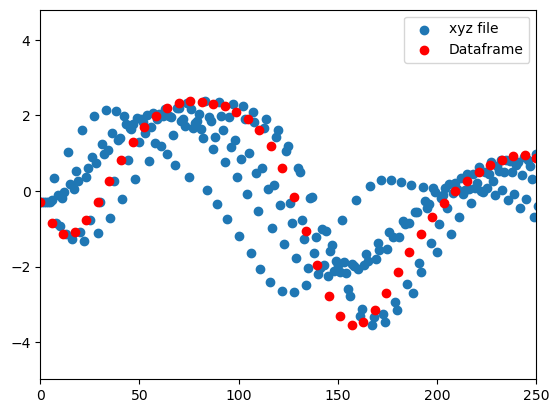

In [24]:
plt.scatter(range(len(mol)), force_xyz, label="xyz file")
plt.scatter(np.linspace(0, 250, 44), force_df['C1(x)'][:44], color="red", label="Dataframe")
plt.legend()
plt.xlim(0, 250, 6)
plt.show()

C:\Users\Birk Dissing\AppData\Local\Temp\ipykernel_29348\950106713.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 250, 6)


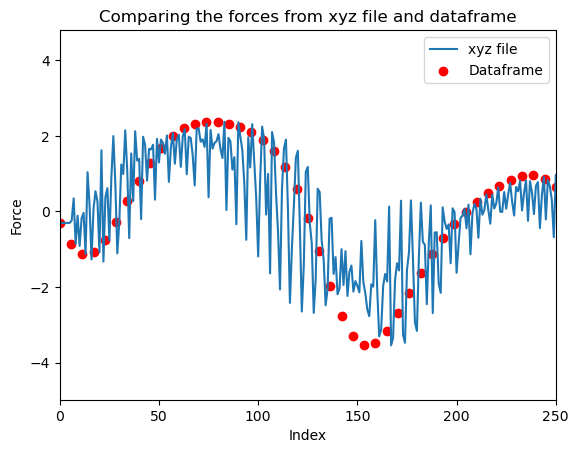

In [52]:
plt.plot(range(len(mol)), force_xyz, label="xyz file")
plt.scatter(np.linspace(0, 250, 45), force_df['C1(x)'][:45], color="red", label="Dataframe")
plt.legend()
plt.xlim(0, 250, 6)
plt.ylabel("Force")
plt.xlabel("Index")
plt.title("Comparing the forces from xyz file and dataframe")
plt.show()

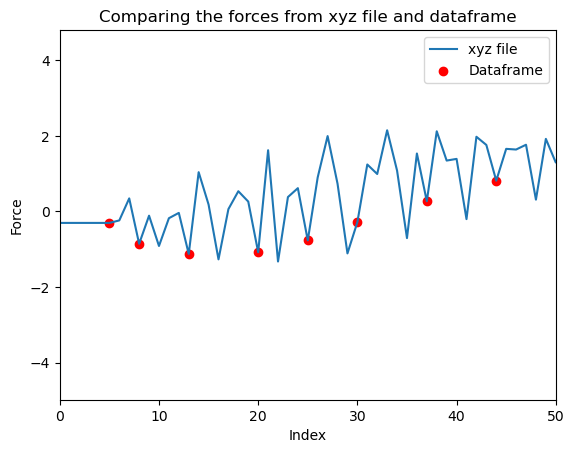

In [37]:
x = [5, 8, 13, 20, 25, 30, 37, 44]
plt.plot(range(len(mol)), force_xyz, label="xyz file")
plt.scatter(x, force_df['C1(x)'][:len(x)], color="red", label="Dataframe")
plt.legend()
plt.xlim(0, 50)
plt.ylabel("Force")
plt.xlabel("Index")
plt.title("Comparing the forces from xyz file and dataframe")
plt.show()

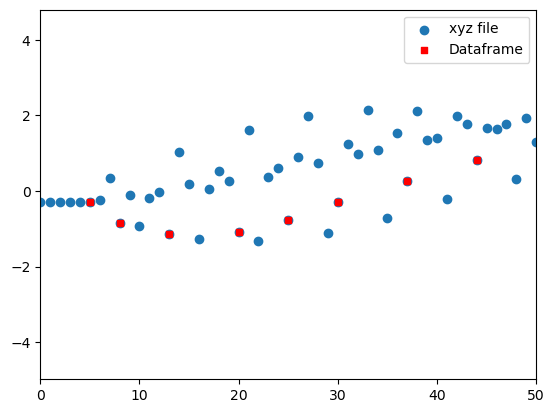

In [36]:
plt.scatter(range(len(mol)), force_xyz, label="xyz file")
plt.scatter(x, force_df['C1(x)'][:len(x)], color="red", label="Dataframe", marker="s", s=15)
plt.legend()
plt.xlim(0, 50)
plt.show()

In [16]:

traj = TrajectoryReader("D:\KU\Masters\Gemma_group\Master thesis\Code\Data\EtOH_moldyn_NVE_help.traj")
print(len(traj))
traj_forces = []
for i in range(len(traj)):
    try:
        
        traj_forces.append(traj[i].get_forces()[0,0])
    except:
        print("Index: "+str(i)+" failed")

force = traj[3].get_forces()[0,0]

24
Index: 3 failed
Index: 8 failed
Index: 9 failed
Index: 10 failed
Index: 12 failed
Index: 13 failed
Index: 14 failed
Index: 15 failed
Index: 16 failed
Index: 17 failed
Index: 18 failed
Index: 19 failed


JSONDecodeError: Expecting ',' delimiter: line 1 column 740 (char 739)